In [5]:
# https://medium.com/latinxinai/tutorial-del-algoritmo-de-agrupamiento-jer%C3%A1rquico-en-python-b3472c0dd829
# https://towardsdatascience.com/9-distance-measures-in-data-science-918109d069fa
# http://exponentis.es/ejemplo-de-uso-de-dbscan-en-python-para-deteccion-de-outliers
!pip install plotly
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from google.colab import files
import scipy.cluster.hierarchy as hc
from sklearn.cluster import AgglomerativeClustering

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


{'Mall_Customers.csv': b'CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)\n1,Male,19,15,39\n2,Male,21,15,81\n3,Female,20,16,6\n4,Female,23,16,77\n5,Female,31,17,40\n6,Female,22,17,76\n7,Female,35,18,6\n8,Female,23,18,94\n9,Male,64,19,3\n10,Female,30,19,72\n11,Male,67,19,14\n12,Female,35,19,99\n13,Female,58,20,15\n14,Female,24,20,77\n15,Male,37,20,13\n16,Male,22,20,79\n17,Female,35,21,35\n18,Male,20,21,66\n19,Male,52,23,29\n20,Female,35,23,98\n21,Male,35,24,35\n22,Male,25,24,73\n23,Female,46,25,5\n24,Male,31,25,73\n25,Female,54,28,14\n26,Male,29,28,82\n27,Female,45,28,32\n28,Male,35,28,61\n29,Female,40,29,31\n30,Female,23,29,87\n31,Male,60,30,4\n32,Female,21,30,73\n33,Male,53,33,4\n34,Male,18,33,92\n35,Female,49,33,14\n36,Female,21,33,81\n37,Female,42,34,17\n38,Female,30,34,73\n39,Female,36,37,26\n40,Female,20,37,75\n41,Female,65,38,35\n42,Male,24,38,92\n43,Male,48,39,36\n44,Female,31,39,61\n45,Female,49,39,28\n46,Female,24,39,65\n47,Female,50,40,55\n48,Female,27,40,47\n4

In [3]:
data= pd.read_csv('Mall_Customers.csv')

In [ ]:
print(data.shape)
data.columns

(200, 5)


Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [ ]:
df= data.iloc[:,[2, 3, 4]].values
df

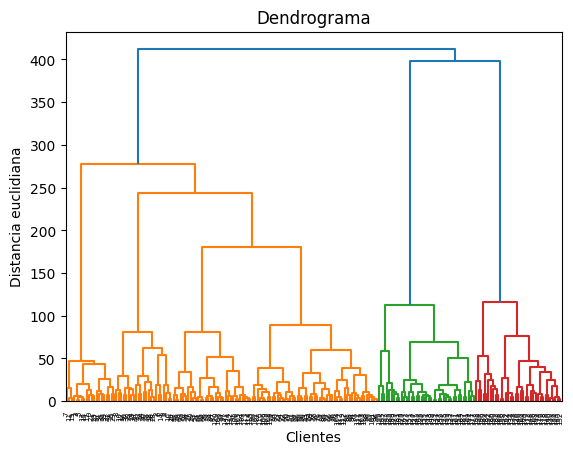

In [ ]:
dend=hc.dendrogram(hc.linkage(df, method= 'ward'))

plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia euclidiana')
plt.show()

In [10]:
clust=AgglomerativeClustering(n_clusters=6, metric='euclidean', linkage='ward')
plo=clust.fit_predict(df)

In [11]:
plo

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 5, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 5,
       4, 5, 1, 5, 5, 5, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 5,
       1, 1, 5, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5, 1, 1, 1, 1, 1, 5, 1, 1, 5,
       1, 1, 1, 5, 1, 1, 1, 5, 1, 5, 1, 5, 5, 1, 1, 5, 1, 5, 1, 1, 1, 1,
       1, 5, 1, 5, 5, 5, 1, 1, 1, 1, 5, 1, 1, 2, 5, 2, 0, 2, 0, 2, 0, 2,
       5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 5, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [12]:
fig = px.scatter_3d(data_frame=data, x="Age", y="Annual Income (k$)", z= 'Spending Score (1-100)', width=1000, height=800, color=plo)
fig.show()


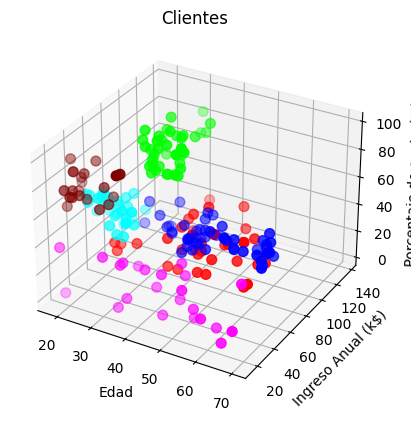

In [14]:
ax = plt.axes(projection="3d")
ax.scatter3D(df[plo==0,0], df[plo==0, 1],df[plo==0, 2], s=50, c='red')
ax.scatter3D(df[plo==1,0], df[plo==1, 1],df[plo==1, 2], s=50, c='blue')
ax.scatter3D(df[plo==2,0], df[plo==2, 1],df[plo==2, 2], s=50, c='lime')
ax.scatter3D(df[plo==3,0], df[plo==3, 1],df[plo==3, 2], s=50, c='maroon')
ax.scatter3D(df[plo==4,0], df[plo==4, 1],df[plo==4, 2], s=50, c='magenta')
ax.scatter3D(df[plo==5,0], df[plo==5, 1],df[plo==5, 2], s=50, c='cyan')
plt.title('Clientes')
ax.set_xlabel('Edad')
ax.set_ylabel('Ingreso Anual (k$)')
ax.set_zlabel('Porcentaje de gasto (%)')
#ax.legend()
plt.show()